In [129]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier



In [130]:
data = pd.read_csv("ObesityDataset.csv")
df = data.copy()

df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


In [131]:
df = df.rename(columns={"Gender":"Genero","Age":"Edad","Height":"Altura","Weight":"Peso","family_history_with_overweight":"historial_familiar",
                        "FAVC":"Frecuencia_Consumo_contenido_calorico",
                        "FCVC":"Frecuencia_Consumo_vegetales_fruta","NCP":"numero_comidas_principales",
                        "CAEC":"picoteo","SMOKE":"fumador","CH2O":"consumo_agua","SCC":"monitoriza_calorias",
                        "FAF":"frecuencia_actividad_fisica","TUE":"tiempo_tegnologia",
                        "CALC":"frecuencia_alcohol","MTRANS":"medio_transporte","NObeyesdad":"nivel_obesidad"})
df
df["IMC"] =  round(df["Peso"]/(df['Altura']**2))



In [132]:
print(df.shape)
df.info()
df.describe()

(2111, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Genero                                 2111 non-null   object 
 1   Edad                                   2111 non-null   int64  
 2   Altura                                 2111 non-null   float64
 3   Peso                                   2111 non-null   float64
 4   historial_familiar                     2111 non-null   object 
 5   Frecuencia_Consumo_contenido_calorico  2111 non-null   object 
 6   Frecuencia_Consumo_vegetales_fruta     2111 non-null   float64
 7   numero_comidas_principales             2111 non-null   float64
 8   picoteo                                2111 non-null   object 
 9   fumador                                2111 non-null   object 
 10  consumo_agua                           2111 non-null   float6

,Edad,Altura,Peso,Frecuencia_Consumo_vegetales_fruta,numero_comidas_principales,consumo_agua,frecuencia_actividad_fisica,tiempo_tegnologia,IMC
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861,29.692563
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926,8.026658
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,13.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000,24.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000,29.000000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000,36.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,51.000000


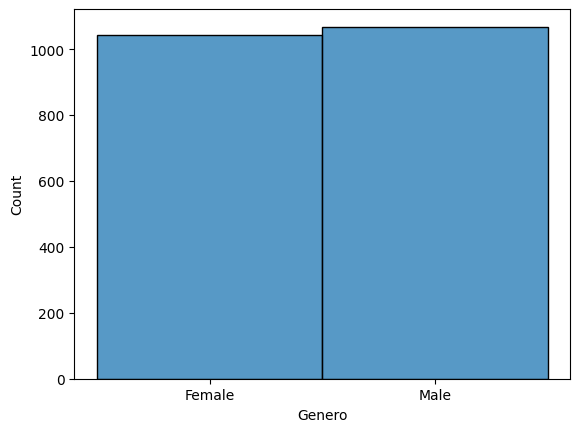

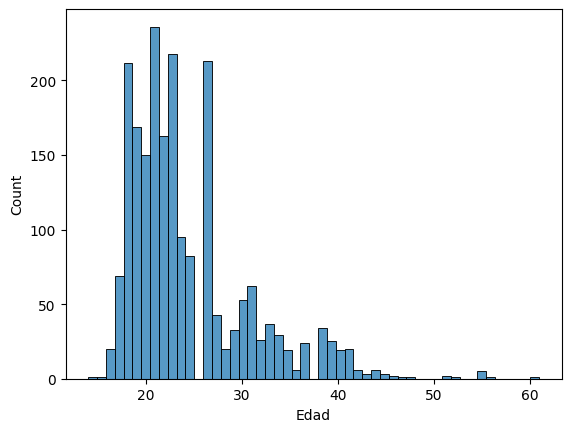

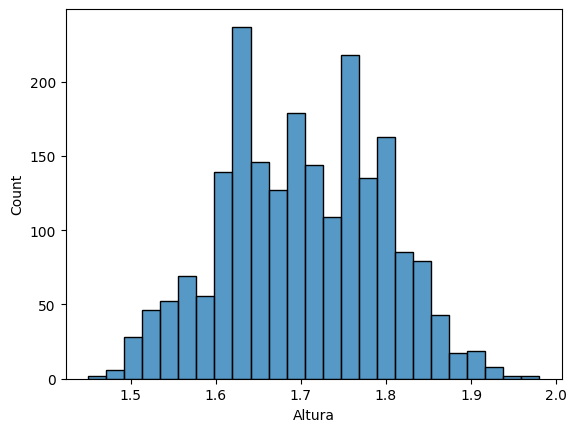

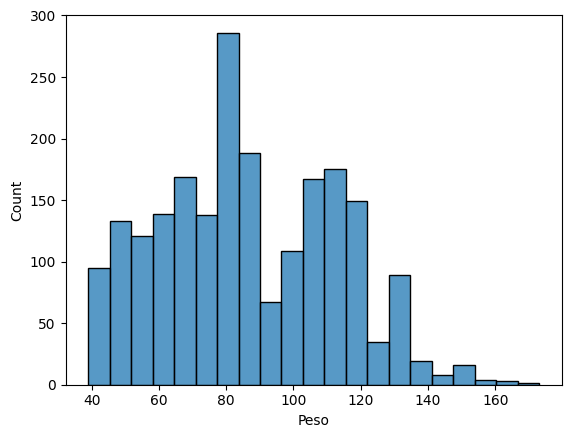

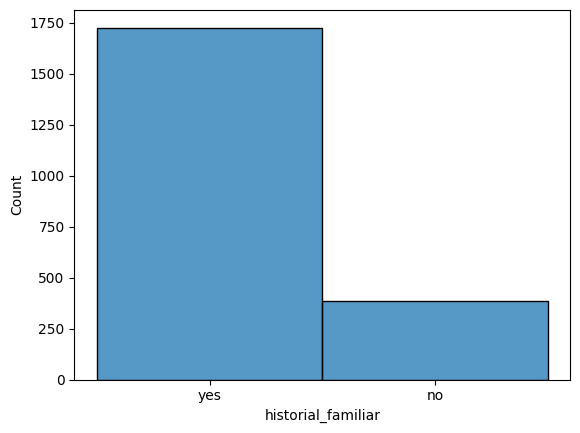

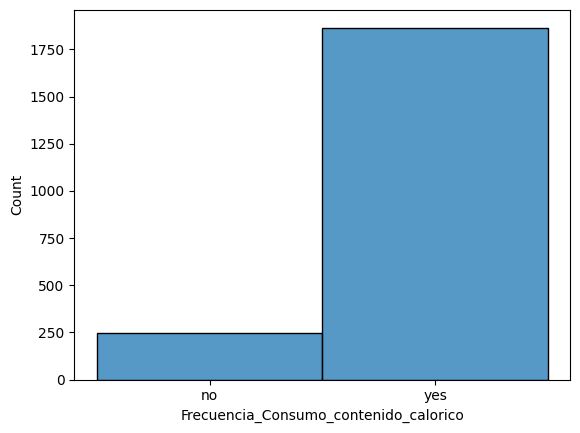

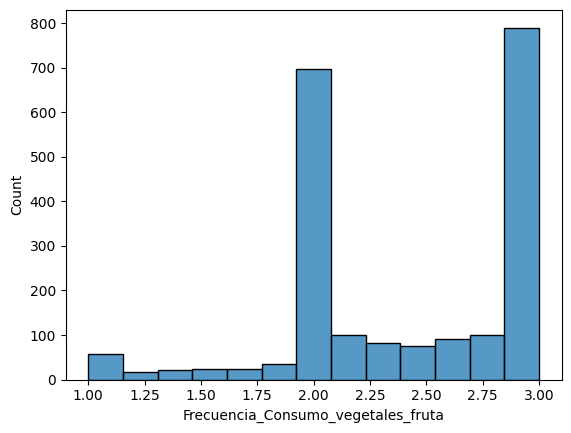

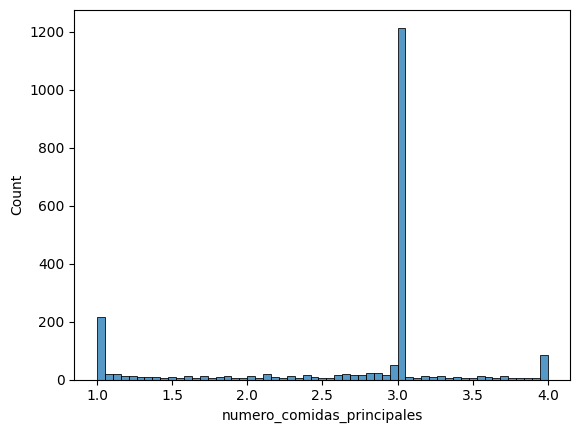

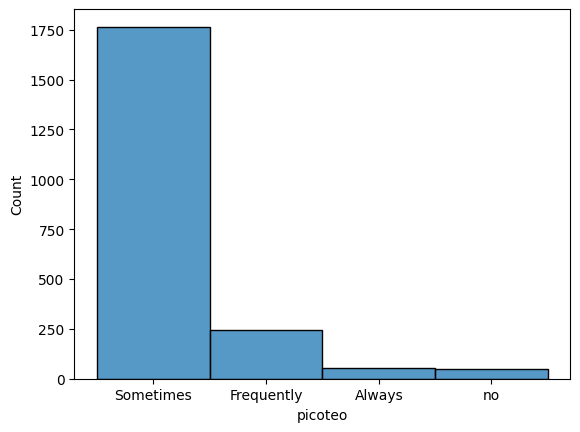

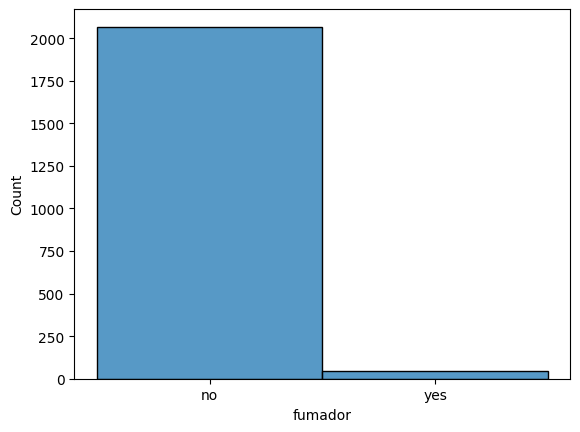

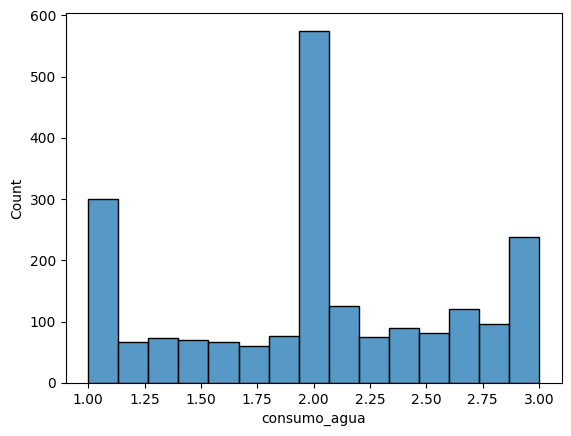

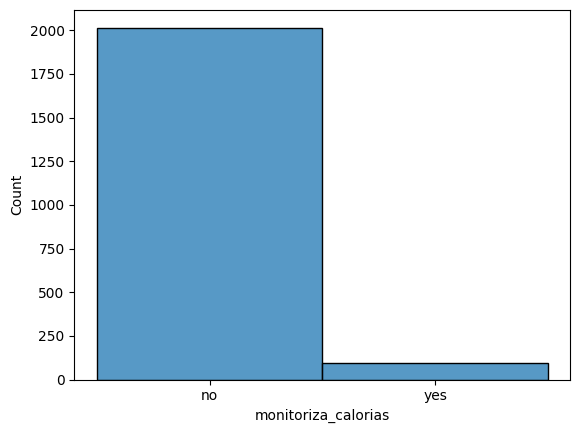

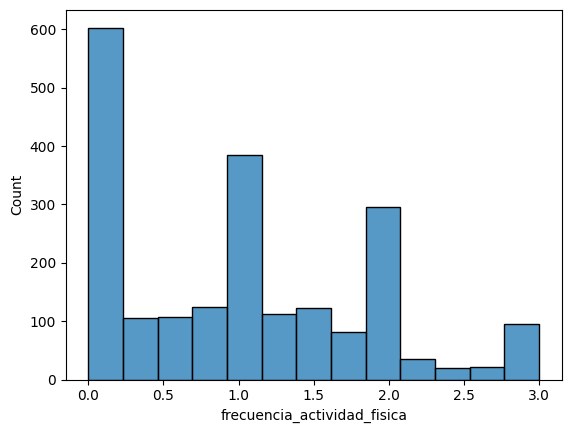

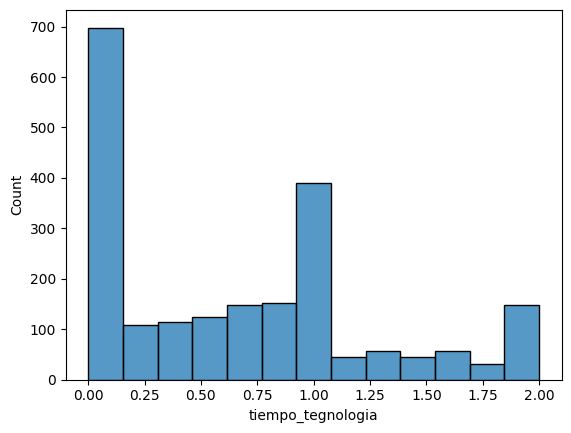

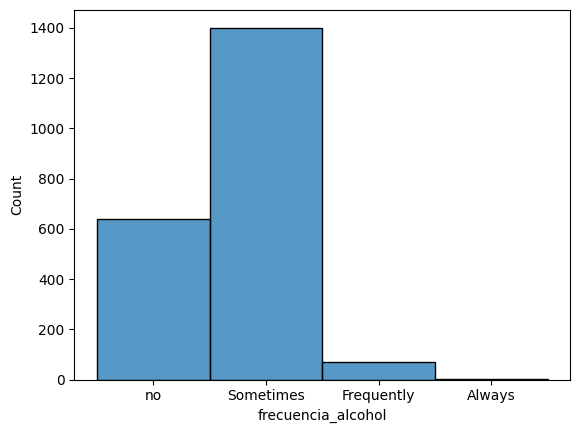

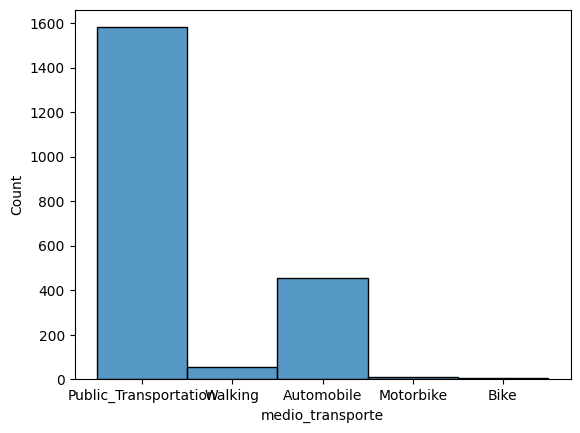

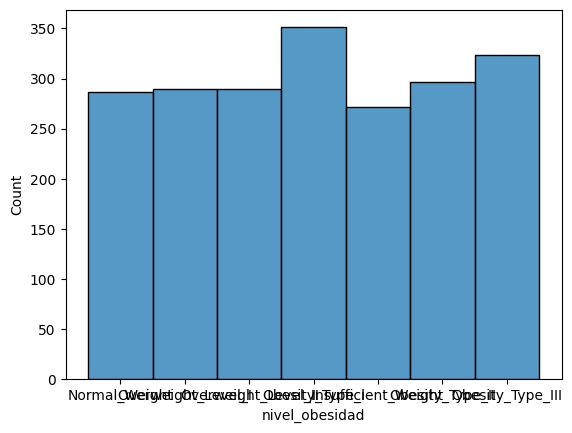

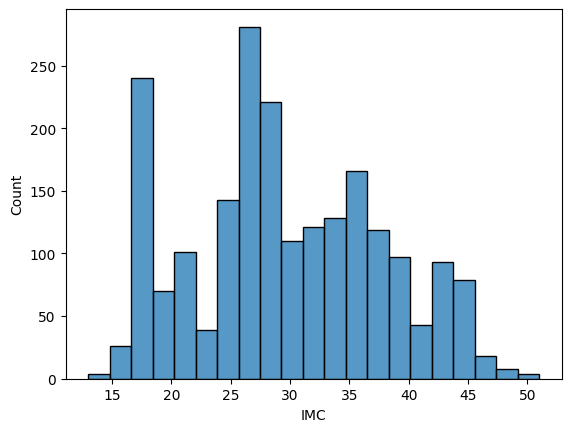

In [133]:
def histograma(df,columna):
    sns.histplot(data=df[columna])
    plt.show()
for x in df:
    histograma(df,x)
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Genero                                 2111 non-null   object 
 1   Edad                                   2111 non-null   int64  
 2   Altura                                 2111 non-null   float64
 3   Peso                                   2111 non-null   float64
 4   historial_familiar                     2111 non-null   object 
 5   Frecuencia_Consumo_contenido_calorico  2111 non-null   object 
 6   Frecuencia_Consumo_vegetales_fruta     2111 non-null   float64
 7   numero_comidas_principales             2111 non-null   float64
 8   picoteo                                2111 non-null   object 
 9   fumador                                2111 non-null   object 
 10  consumo_agua                           2111 non-null   float64
 11  moni

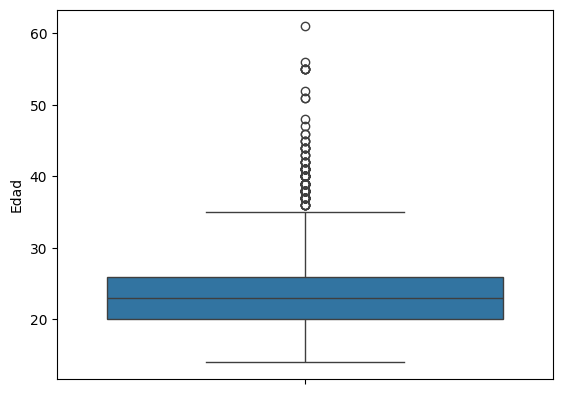

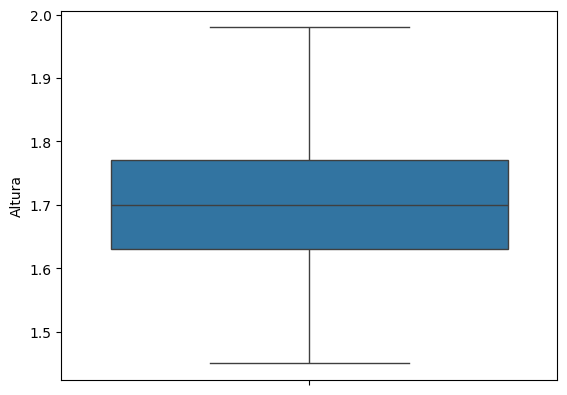

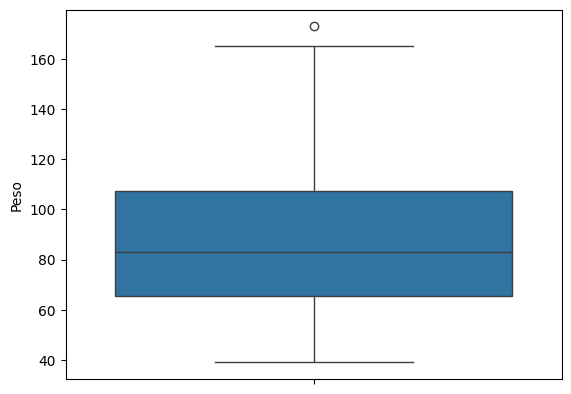

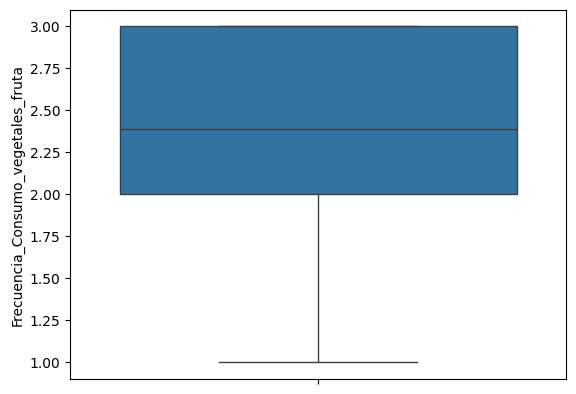

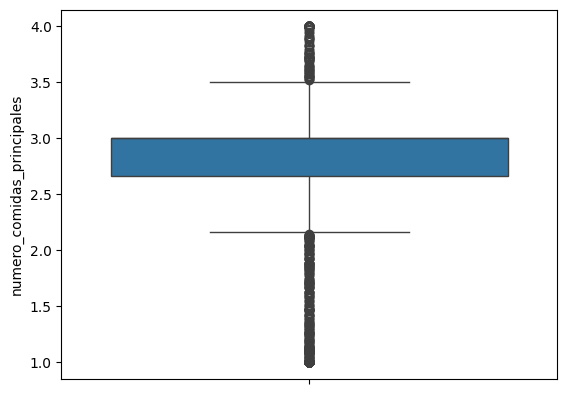

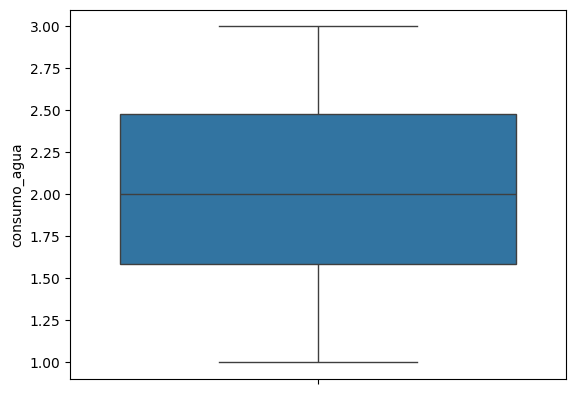

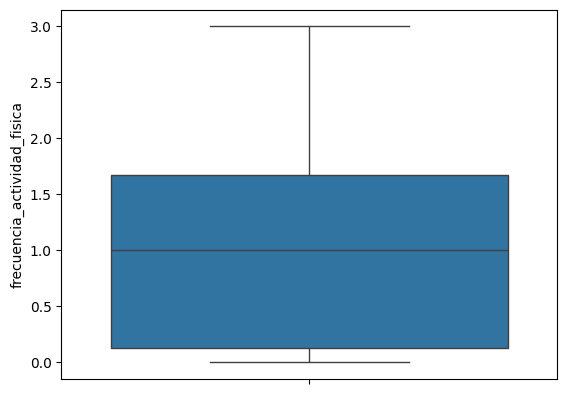

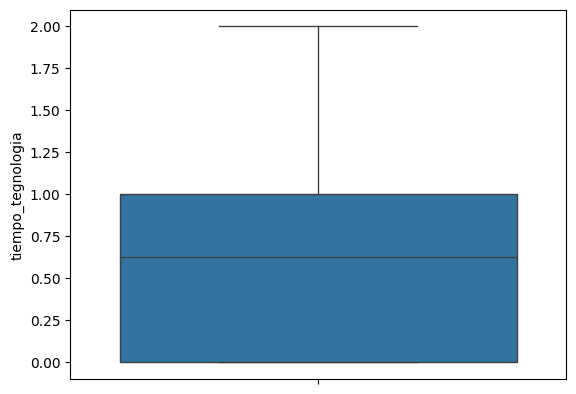

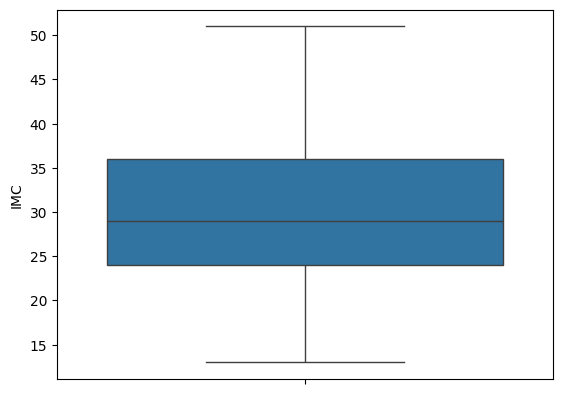

In [134]:



def boxplot(df,columna):
    sns.boxplot(data=df[columna])
    plt.show()
df.info()
df_mumericas = df.select_dtypes(include=["int64","float64"])
df_mumericas.info()
for x in df_mumericas :
    boxplot(df,x)


#Considero no quitar outliers porque en este caso todos los datos son representativos de la muestra  en el caso de comidas principales  depende de la persona  en el caso del peso tambien es representativo debido a que el dataset es sobre personas con sobrepeso y en el caso de edad  hay distintos tipos y todas son representativas 

In [135]:
df
label = LabelEncoder()
df['nivel_obesidad'] = label.fit_transform(df['nivel_obesidad'])
df['medio_transporte'] = label.fit_transform(df['medio_transporte'])
df['frecuencia_alcohol'] = label.fit_transform(df['frecuencia_alcohol'])
df


,Genero,Edad,Altura,Peso,historial_familiar,Frecuencia_Consumo_contenido_calorico,Frecuencia_Consumo_vegetales_fruta,numero_comidas_principales,picoteo,fumador,consumo_agua,monitoriza_calorias,frecuencia_actividad_fisica,tiempo_tegnologia,frecuencia_alcohol,medio_transporte,nivel_obesidad,IMC
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,3,3,1,24.0
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,2,3,1,24.0
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,1,3,1,24.0
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,1,4,5,27.0
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,2,3,6,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,2,3,4,45.0
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,2,3,4,44.0
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,2,3,4,44.0
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,2,3,4,44.0


In [136]:
# encodeamos el resto  de variables con get dummies 
df = pd.get_dummies(df,drop_first=True)
df


,Edad,Altura,Peso,Frecuencia_Consumo_vegetales_fruta,numero_comidas_principales,consumo_agua,frecuencia_actividad_fisica,tiempo_tegnologia,frecuencia_alcohol,medio_transporte,nivel_obesidad,IMC,Genero_Male,historial_familiar_yes,Frecuencia_Consumo_contenido_calorico_yes,picoteo_Frequently,picoteo_Sometimes,picoteo_no,fumador_yes,monitoriza_calorias_yes
0,21,1.62,64.00,2.0,3.0,2.00,0.00,1.000,3,3,1,24.0,False,True,False,False,True,False,False,False
1,21,1.52,56.00,3.0,3.0,3.00,3.00,0.000,2,3,1,24.0,False,True,False,False,True,False,True,True
2,23,1.80,77.00,2.0,3.0,2.00,2.00,1.000,1,3,1,24.0,True,True,False,False,True,False,False,False
3,27,1.80,87.00,3.0,3.0,2.00,2.00,0.000,1,4,5,27.0,True,False,False,False,True,False,False,False
4,22,1.78,89.80,2.0,1.0,2.00,0.00,0.000,2,3,6,28.0,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21,1.71,131.41,3.0,3.0,1.73,1.68,0.906,2,3,4,45.0,False,True,True,False,True,False,False,False
2107,22,1.75,133.74,3.0,3.0,2.01,1.34,0.599,2,3,4,44.0,False,True,True,False,True,False,False,False
2108,23,1.75,133.69,3.0,3.0,2.05,1.41,0.646,2,3,4,44.0,False,True,True,False,True,False,False,False
2109,24,1.74,133.35,3.0,3.0,2.85,1.14,0.586,2,3,4,44.0,False,True,True,False,True,False,False,False


                                               Edad    Altura      Peso  \
Edad                                       1.000000 -0.025775  0.203451   
Altura                                    -0.025775  1.000000  0.462264   
Peso                                       0.203451  0.462264  1.000000   
Frecuencia_Consumo_vegetales_fruta         0.017020 -0.038580  0.216268   
numero_comidas_principales                -0.043951  0.243387  0.107413   
consumo_agua                              -0.045583  0.213469  0.200543   
frecuencia_actividad_fisica               -0.145081  0.295354 -0.051355   
tiempo_tegnologia                         -0.296609  0.051583 -0.071571   
frecuencia_alcohol                        -0.045578 -0.129569 -0.206676   
medio_transporte                          -0.600567 -0.073756  0.004610   
nivel_obesidad                             0.235660  0.039671  0.387641   
IMC                                        0.242958  0.130652  0.934245   
Genero_Male              

<Axes: >

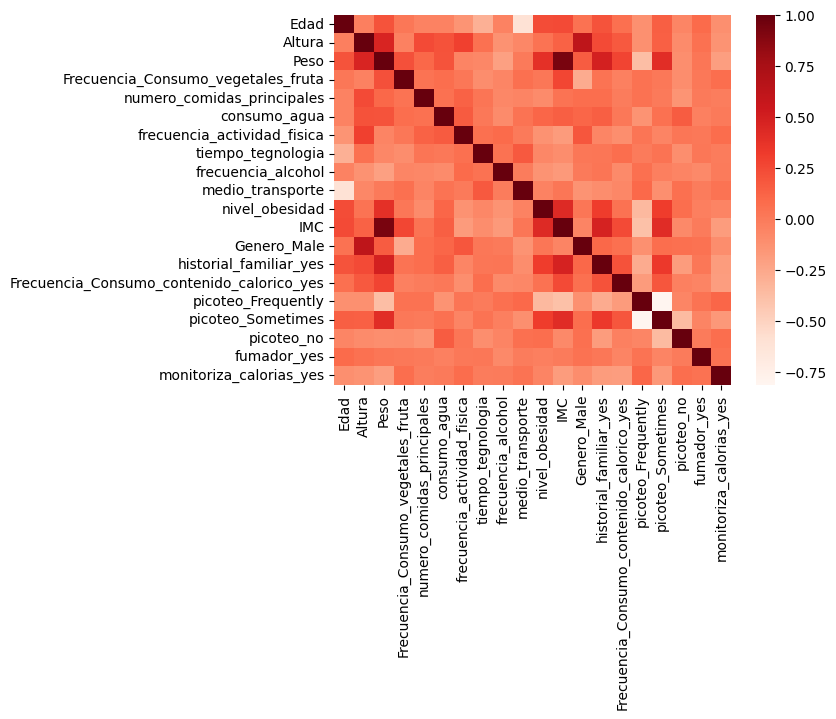

In [137]:
matriz = df.corr()
print(matriz)
sns.heatmap(data=matriz,cmap='Reds')


In [138]:
#selecciono variables objetivo 
escalador = StandardScaler()
X = df.drop(columns="IMC")
y = pd.DataFrame( df['IMC'])
X_scaled = escalador.fit_transform(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# calculo el vif de cada variable 
print("VIF de cada variable:")
print(vif_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)



# Hacer predicciones en el conjunto de prueba
y_pred = regresion_lineal.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")


VIF de cada variable:
                                     Variable       VIF
0                                        Edad  2.004377
1                                      Altura  2.661222
2                                        Peso  2.437865
3          Frecuencia_Consumo_vegetales_fruta  1.241286
4                  numero_comidas_principales  1.123931
5                                consumo_agua  1.163063
6                 frecuencia_actividad_fisica  1.241041
7                           tiempo_tegnologia  1.157285
8                          frecuencia_alcohol  1.134753
9                            medio_transporte  1.758158
10                             nivel_obesidad  1.417602
11                                Genero_Male  1.933536
12                     historial_familiar_yes  1.526062
13  Frecuencia_Consumo_contenido_calorico_yes  1.180941
14                         picoteo_Frequently  5.025502
15                          picoteo_Sometimes  5.858942
16                        

In [139]:
escalador = StandardScaler()
X = df.drop(columns="IMC")
y = pd.DataFrame( df['IMC'])
X_scaled = escalador.fit_transform(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# calculo el vif de cada variable 
print("VIF de cada variable:")
print(vif_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo y entreno el modelo de regresión lineal
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)




y_pred = regresion_lineal.predict(X_test)

# metricas de evaluacion 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")


VIF de cada variable:
                                     Variable       VIF
0                                        Edad  2.004377
1                                      Altura  2.661222
2                                        Peso  2.437865
3          Frecuencia_Consumo_vegetales_fruta  1.241286
4                  numero_comidas_principales  1.123931
5                                consumo_agua  1.163063
6                 frecuencia_actividad_fisica  1.241041
7                           tiempo_tegnologia  1.157285
8                          frecuencia_alcohol  1.134753
9                            medio_transporte  1.758158
10                             nivel_obesidad  1.417602
11                                Genero_Male  1.933536
12                     historial_familiar_yes  1.526062
13  Frecuencia_Consumo_contenido_calorico_yes  1.180941
14                         picoteo_Frequently  5.025502
15                          picoteo_Sometimes  5.858942
16                        

In [140]:
escalador = StandardScaler()
X = df.drop(columns="IMC")
y = pd.DataFrame( df['IMC'])
X_scaled = escalador.fit_transform(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# calculo el vif de cada variable 
print("VIF de cada variable:")
print(vif_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

arbol_decision = DecisionTreeRegressor(random_state=42)

# Definir el grid de parámetros
param_grid = {
    'max_depth': [2, 4,6,8,],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['poisson', 'absolute_error', 'friedman_mse', 'squared_error'],
    'splitter': ['best' , 'random']
}

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=arbol_decision, param_grid=param_grid, cv=5,)

# Ajustar el modelo con los parámetros especificados
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")

# Evaluar el modelo en el conjunto de prueba
accuracy = grid_search.score(X_test, y_test)


VIF de cada variable:
                                     Variable       VIF
0                                        Edad  2.004377
1                                      Altura  2.661222
2                                        Peso  2.437865
3          Frecuencia_Consumo_vegetales_fruta  1.241286
4                  numero_comidas_principales  1.123931
5                                consumo_agua  1.163063
6                 frecuencia_actividad_fisica  1.241041
7                           tiempo_tegnologia  1.157285
8                          frecuencia_alcohol  1.134753
9                            medio_transporte  1.758158
10                             nivel_obesidad  1.417602
11                                Genero_Male  1.933536
12                     historial_familiar_yes  1.526062
13  Frecuencia_Consumo_contenido_calorico_yes  1.180941
14                         picoteo_Frequently  5.025502
15                          picoteo_Sometimes  5.858942
16                        

MAE (Error Absoluto Medio): 0.5186
MSE (Error Cuadrático Medio): 0.6618
RMSE (Raíz del Error Cuadrático Medio): 0.8135
R² (Coeficiente de Determinación): 0.9900


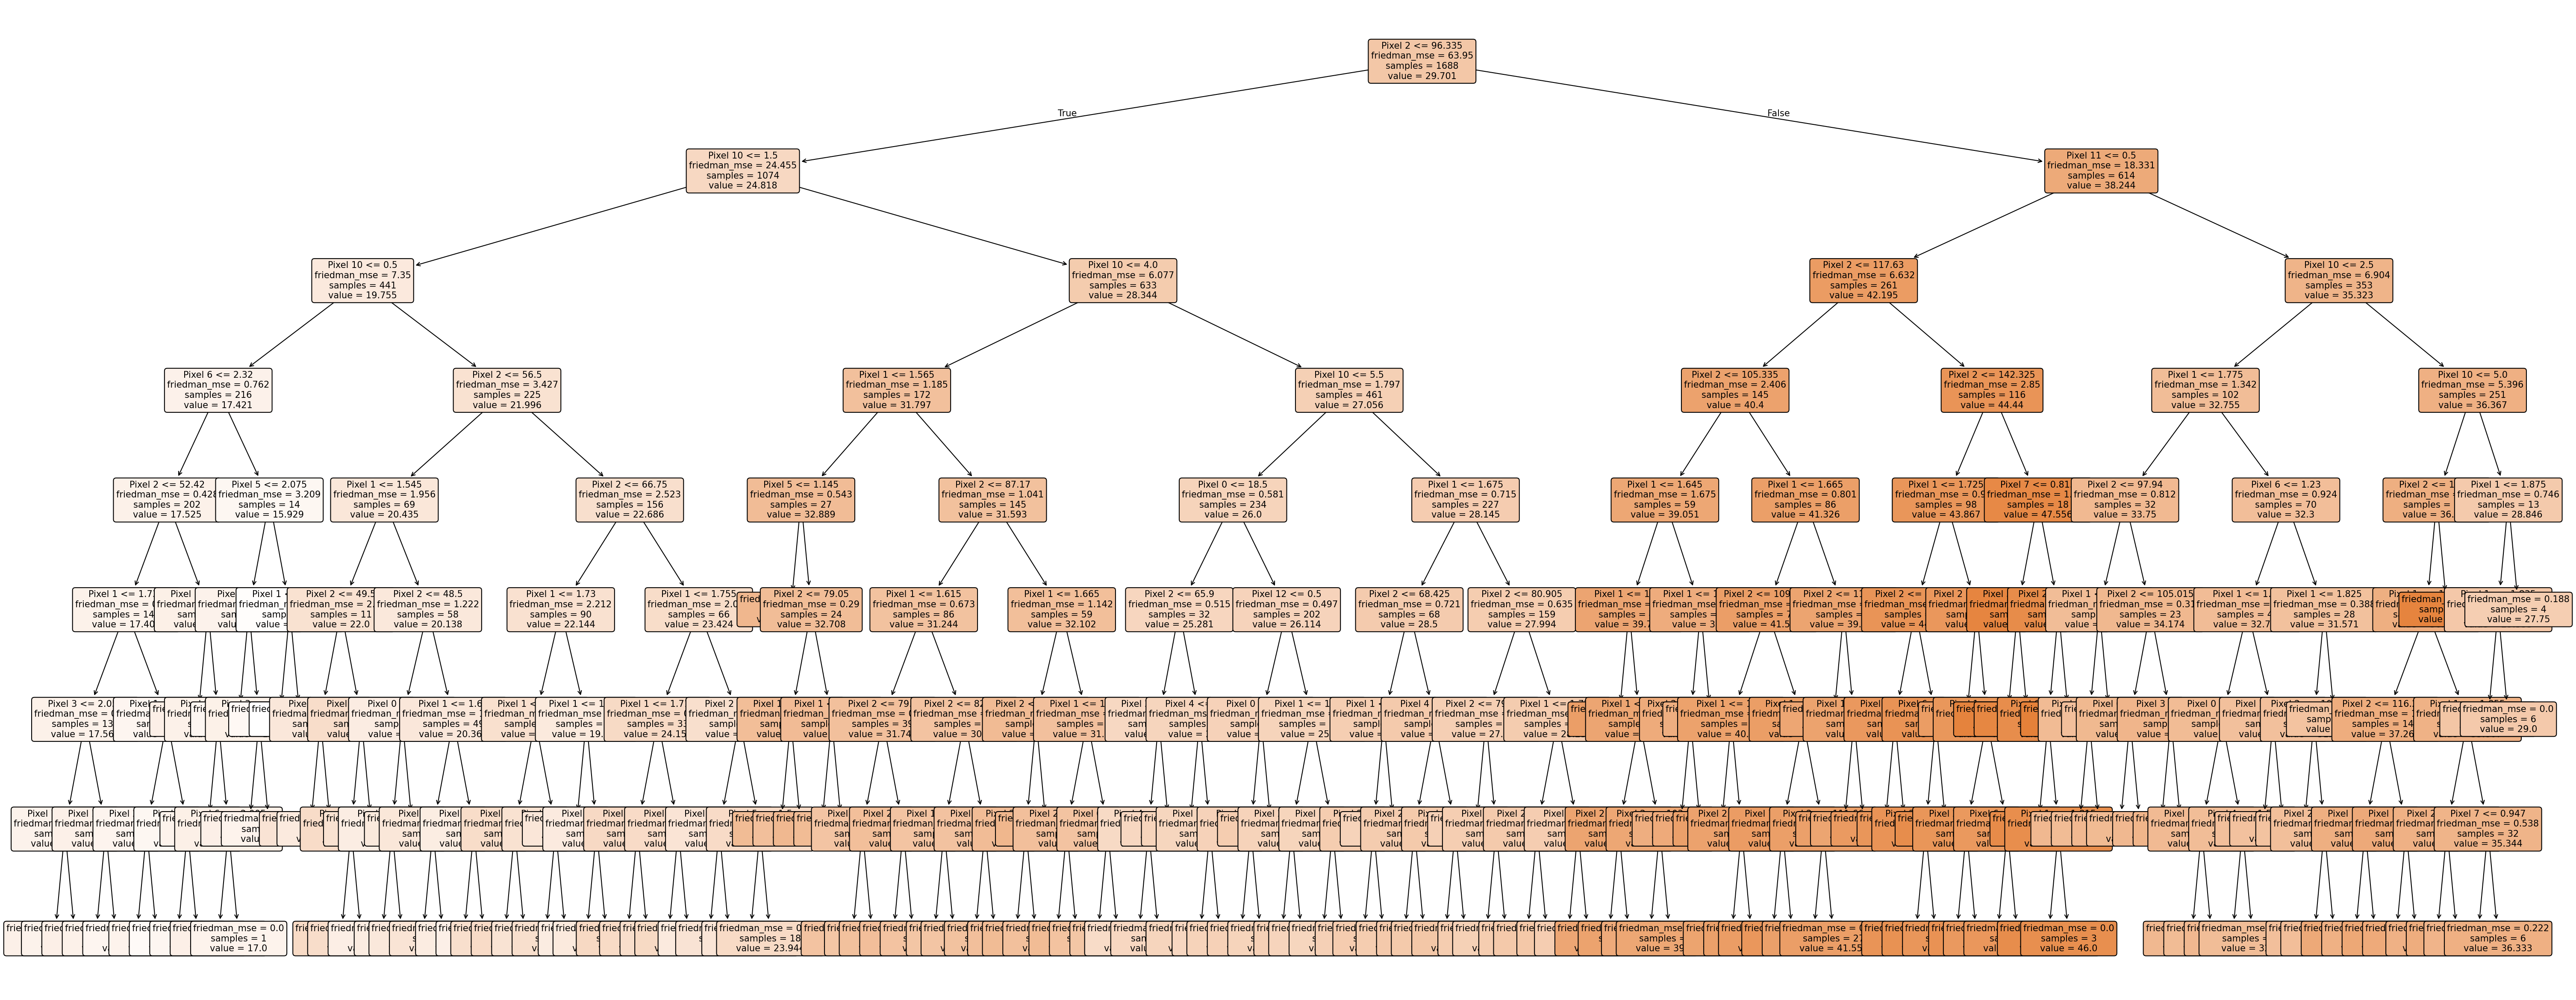

In [141]:
# Entrenar el modelo
arbol =  DecisionTreeRegressor(random_state=42, criterion= 'friedman_mse', max_depth= 8, min_samples_leaf= 1, min_samples_split=5, splitter='best')
arbol.fit(X_train, y_train)


y_pred = arbol.predict(X_test)


# metricas de evaluacion 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")
# Visualizar el árbol de decisión
plt.figure(figsize=(50, 20), dpi=150)  
tree.plot_tree(
    arbol, 
    filled=True, 
    feature_names=[f'Pixel {i}' for i in range(X.shape[1])], 
    class_names=[str(i) for i in range(10)],
    fontsize=10,
    rounded=True,  
    proportion=False  
)
plt.show()


# considerando los resultados de ambos modelos es preferible utilizar un arbol debido a su mejor rendimiento aunque al no haber mucha diferencia entre los dos yo preferiria usar una regresion multiple si mi poder de computo es menor 

LogisticRegression(C=10, max_iter=8000)

Resultados con ajuste automático de hiperparámetros:
Mejores parámetros: {'C': 10, 'solver': 'lbfgs'}
Mejor Accuracy en validación cruzada: 99.46%
              precision    recall  f1-score   support

   bajo_peso       1.00      1.00      1.00       138
 Peso_normal       1.00      1.00      1.00       170
   Sobrepeso       1.00      1.00      1.00       153
    Obesidad       1.00      1.00      1.00       173

    accuracy                           1.00       634
   macro avg       1.00      1.00      1.00       634
weighted avg       1.00      1.00      1.00       634



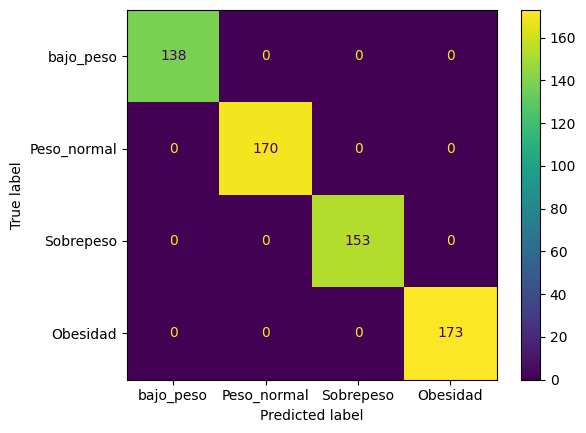

In [ ]:




df["etiquetas"] = pd.qcut(df["IMC"],4 , labels=["bajo_peso","Peso_normal","Sobrepeso","Obesidad"])

X = df.drop(columns="etiquetas")
escaler = StandardScaler()
x_scaled = escaler.fit_transform(X)
y = pd.DataFrame(df["etiquetas"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
parametros = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  
    "solver": ["liblinear", "lbfgs"]  
}


grid_search = GridSearchCV(LogisticRegression(max_iter=8000), parametros, cv=5, scoring="accuracy", n_jobs=-1)

grid_search.fit(X_train, y_train.values.ravel())  #tengo que hacer ravel para pasar los valores porque si no da una advertencia

# Mejor modelo encontrado
mejor_resultado = grid_search.best_estimator_

# Predicciones del mejor modelo
y_pred_best = mejor_resultado.predict(X_test)
print(mejor_resultado)
print("\nResultados con ajuste automático de hiperparámetros:")
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor Accuracy en validación cruzada: {grid_search.best_score_ * 100:.2f}%")





 
regresion_logistica = LogisticRegression(C = 10, solver='lbfgs', max_iter=8000) 


regresion_logistica.fit(X_train, y_train.values.ravel())

# Realizamos predicciones
y_pred = regresion_logistica.predict(X_test)

# reporte de clasificacion
print(classification_report(y_test, y_pred, target_names=["bajo_peso","Peso_normal","Sobrepeso","Obesidad"]))

# Matriz de confusión
matrix = ConfusionMatrixDisplay.from_estimator(regresion_logistica, X_test, y_test, display_labels=["bajo_peso","Peso_normal","Sobrepeso","Obesidad"])

plt.show()



Mejores parámetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy en el conjunto de prueba: 1.0000
Accuracy: 100.00%


[Text(0.3333333333333333, 0.875, 'IMC <= 24.5\ngini = 0.748\nsamples = 1477\nvalue = [323.0, 412.0, 372.0, 370.0]\nclass = Peso_normal'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 370\nvalue = [0, 0, 0, 370]\nclass = Obesidad'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'IMC <= 29.5\ngini = 0.663\nsamples = 1107\nvalue = [323, 412, 372, 0]\nclass = Peso_normal'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 412\nvalue = [0, 412, 0, 0]\nclass = Peso_normal'),
 Text(0.6666666666666666, 0.375, 'IMC <= 36.5\ngini = 0.498\nsamples = 695\nvalue = [323.0, 0.0, 372.0, 0.0]\nclass = Sobrepeso'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 372\nvalue = [0, 0, 372, 0]\nclass = Sobrepeso'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 323\nvalue = [323, 0, 0, 0]\nclass = bajo_peso')]

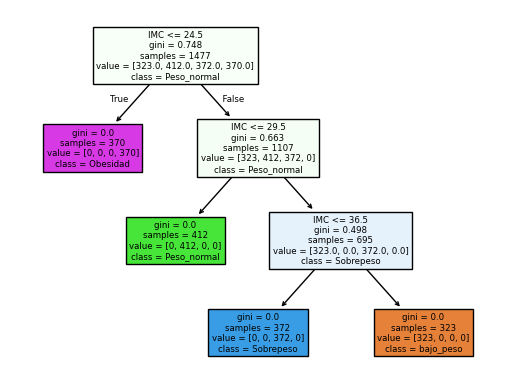

In [143]:
df["etiquetas"] = pd.qcut(df["IMC"],4 , labels=["bajo_peso","Peso_normal","Sobrepeso","Obesidad"])

X = df.drop(columns="etiquetas")
escaler = StandardScaler()
x_scaled = escaler.fit_transform(X)
y = pd.DataFrame(df["etiquetas"])
# Crear el clasificador de árbol de decisión
arbol = DecisionTreeClassifier(random_state=42)

# Definir el grid de parámetros
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best' , 'random']
}

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=arbol, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con los parámetros especificados
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")

accuracy = grid_search.score(X_test, y_test)
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")
arbol = DecisionTreeClassifier(criterion='gini', max_depth= 3, min_samples_leaf= 1, min_samples_split=2, splitter= 'best')
# Entrenar el modelo
arbol.fit(X_train, y_train)

# Hacer predicciones
y_pred = arbol.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualizar el árbol de decisión
tree.plot_tree(arbol, filled=True, feature_names=X.columns, class_names=["bajo_peso","Peso_normal","Sobrepeso","Obesidad"])

# Tras haber probado distintos modelos considero que el arbol es el mas optimo la regresion logistica multinomial clasifica el resultado  con una precision muy alta pero el arbol acierta el 100 por cien de las veces haciendo de este el modelo mas optimo